In [1]:
import os
os.chdir('../')
os.getcwd()

'e:\\github_clone\\end-to-end-game-engagement-classification-project'

In [2]:
import numpy as np
import torch
import pandas as pd
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
from src.utils import save_object
from src.components import EngageModel
from src.components import DataPreprocessor

In [3]:
train_csv_path = 'artifacts\\train.csv'
test_csv_path = 'artifacts\\test.csv'
target_column = 'EngagementLevel'
categorical_columns = ['Gender', 'Location', 'GameGenre', 'GameDifficulty']
exclude_columns = ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']

data_preprocessor = DataPreprocessor(train_csv_path, test_csv_path, target_column, categorical_columns, exclude_columns)

# Load and encode the data
df_train, df_test = data_preprocessor.load_and_encode_data()
X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor = data_preprocessor.to_tensors(df_train, df_test)

In [4]:
print(f"{X_train_tensor.shape}, {y_train_tensor.shape}, {X_test_tensor.shape}, {y_test_tensor.shape}")

torch.Size([32027, 11]), torch.Size([32027]), torch.Size([8007, 11]), torch.Size([8007])


In [5]:
model = EngageModel(11, 3)

In [6]:
model.train(X_train_tensor, y_train_tensor, epochs=100, batch_size=32)

Epoch 1/100, Loss: 0.48225653171539307, Training Accuracy: 0.7689
Model saved at artifacts\model.pth
Epoch 2/100, Loss: 0.7045077681541443, Training Accuracy: 0.8144
Model saved at artifacts\model.pth
Epoch 3/100, Loss: 0.4932153820991516, Training Accuracy: 0.8269
Model saved at artifacts\model.pth
Epoch 4/100, Loss: 0.4388221204280853, Training Accuracy: 0.8409
Model saved at artifacts\model.pth
Epoch 5/100, Loss: 0.4333448112010956, Training Accuracy: 0.8082
Epoch 6/100, Loss: 0.3655010163784027, Training Accuracy: 0.8569
Model saved at artifacts\model.pth
Epoch 7/100, Loss: 0.31505802273750305, Training Accuracy: 0.8570
Model saved at artifacts\model.pth
Epoch 8/100, Loss: 0.3998725116252899, Training Accuracy: 0.8704
Model saved at artifacts\model.pth
Epoch 9/100, Loss: 0.1560330092906952, Training Accuracy: 0.8682
Epoch 10/100, Loss: 0.4210771918296814, Training Accuracy: 0.8834
Model saved at artifacts\model.pth
Epoch 11/100, Loss: 0.3534579575061798, Training Accuracy: 0.8780
E

In [6]:
model.load_model()
test_accuracy = model.evaluate(X_test_tensor, y_test_tensor)
print(f'Test Accuracy: {test_accuracy:.4f}')

Model loaded
Test Accuracy: 0.9126


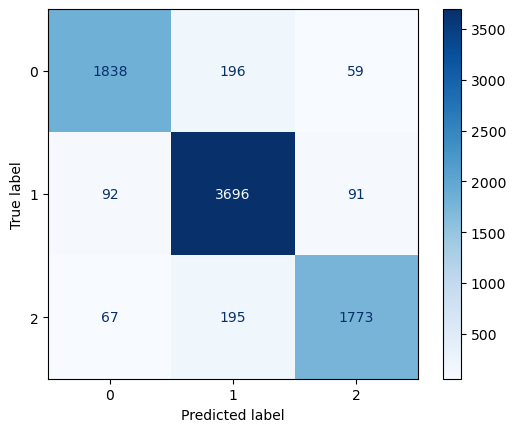

array([[1838,  196,   59],
       [  92, 3696,   91],
       [  67,  195, 1773]], dtype=int64)

In [7]:
model.compute_confusion_matrix(X_test_tensor, y_test_tensor)